In [1]:
import pandas as pd
df = pd.read_csv('Telco.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [3]:
df['Churn Reason'] = df['Churn Reason'].fillna('Dont Know')

In [4]:
df.drop(columns=["Count", "Lat Long", "Churn Label"], inplace=True)

In [5]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Latitude           7043 non-null   float64
 6   Longitude          7043 non-null   float64
 7   Gender             7043 non-null   object 
 8   Senior Citizen     7043 non-null   object 
 9   Partner            7043 non-null   object 
 10  Dependents         7043 non-null   object 
 11  Tenure Months      7043 non-null   int64  
 12  Phone Service      7043 non-null   object 
 13  Multiple Lines     7043 non-null   object 
 14  Internet Service   7043 non-null   object 
 15  Online Security    7043 non-null   object 
 16  Online Backup      7043 

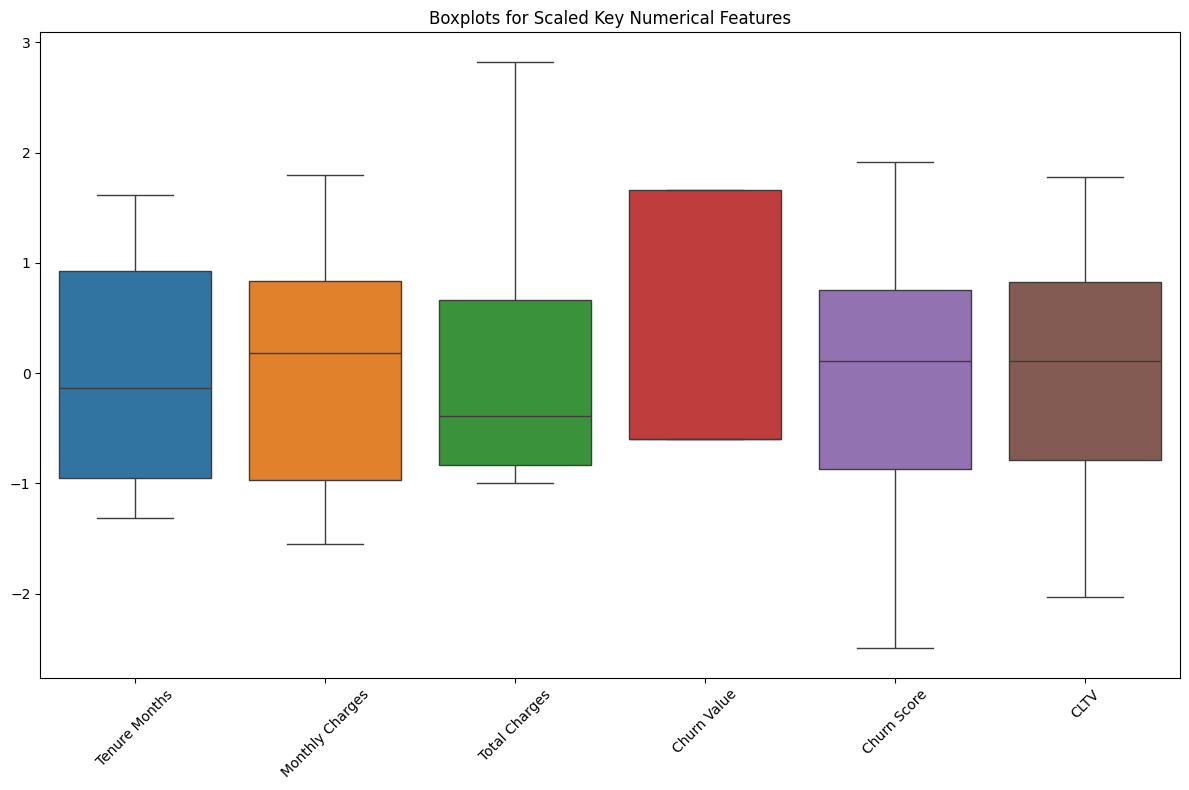

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to scale and plot
columns_to_scale = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
df_scaled = df[columns_to_scale].copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot for the scaled columns
sns.boxplot(data=df_scaled)

# Set plot labels and title
plt.title("Boxplots for Scaled Key Numerical Features")
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
import numpy as np

# Calculate Z-scores for the selected columns
z_scores = np.abs(df_scaled[columns_to_scale])

# Set a threshold for Z-score (e.g., 3 standard deviations)
outliers_z = (z_scores > 3).sum()

# Print the number of outliers detected by Z-score
print("Number of outliers detected using Z-score:", outliers_z)


Number of outliers detected using Z-score: Tenure Months      0
Monthly Charges    0
Total Charges      0
Churn Value        0
Churn Score        0
CLTV               0
dtype: int64


In [9]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', 'Dont Know'],
      dtype=object)

In [10]:
# Merging 'Dont Know' and 'Don't know' into a single category, with 'Unknown'
df['Churn Reason'] = df['Churn Reason'].replace({"Dont Know": "Unknown", "Don't know": "Unknown"})

In [11]:
df['Churn Reason'].value_counts()

Churn Reason
Unknown                                      5328
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Limited range of services                      44
Long distance charges                          44
Lack of affordable download/upload speed       44
Poor expertise of phone support                20
Poor expertise of online support               19
Deceased                             

In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Churn Reason'], df['Churn Value'])

# Apply Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant relationship between Churn Reason and Churn Value")
else:
    print("No significant relationship found")


There is a significant relationship between Churn Reason and Churn Value


In [13]:
df.loc[:, 'Churn Reason Combined'] = df['Churn Reason']

df.loc[:, 'Churn Reason Combined'] = df['Churn Reason Combined'].replace({
    # Already merged categories
    'Service dissatisfaction': 'Service Issues',
    'Attitude of service provider': 'Service Issues',
    'Lack of self-service on Website': 'Service Issues',
    'Limited range of services': 'Service Issues',
    
    'Poor expertise of phone support': 'Support Issues',
    'Poor expertise of online support': 'Support Issues',
    
    'Competitor offered higher download speeds': 'Competitor Advantage',
    'Competitor offered more data': 'Competitor Advantage',
    'Competitor made better offer': 'Competitor Advantage',
    'Competitor had better devices': 'Competitor Advantage',  # Adding this one too

    # Newly merged categories
    'Network reliability': 'Network Issues',
    'Lack of affordable download/upload speed': 'Network Issues',

    'Price too high': 'Billing & Pricing Issues',
    'Extra data charges': 'Billing & Pricing Issues',
    'Long distance charges': 'Billing & Pricing Issues'
})

# Drop rows where 'Churn Reason Combined' is 'Deceased'
df = df[df['Churn Reason Combined'] != 'Deceased']

# Check updated counts
print(df['Churn Reason Combined'].value_counts())

Churn Reason Combined
Unknown                       5328
Competitor Advantage           621
Service Issues                 356
Billing & Pricing Issues       199
Attitude of support person     192
Network Issues                 147
Product dissatisfaction        102
Moved                           53
Support Issues                  39
Name: count, dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7037 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7037 non-null   object 
 1   Country                7037 non-null   object 
 2   State                  7037 non-null   object 
 3   City                   7037 non-null   object 
 4   Zip Code               7037 non-null   int64  
 5   Latitude               7037 non-null   float64
 6   Longitude              7037 non-null   float64
 7   Gender                 7037 non-null   object 
 8   Senior Citizen         7037 non-null   object 
 9   Partner                7037 non-null   object 
 10  Dependents             7037 non-null   object 
 11  Tenure Months          7037 non-null   int64  
 12  Phone Service          7037 non-null   object 
 13  Multiple Lines         7037 non-null   object 
 14  Internet Service       7037 non-null   object 
 15  Online Se

In [24]:
# Drop columns that are not useful for churn prediction
dfx = df.drop(columns=['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude'])

dfx

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Churn Reason Combined
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,Competitor Advantage
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices,Competitor Advantage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,45,5306,Unknown,Unknown
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,0,59,2140,Unknown,Unknown
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,0,71,5560,Unknown,Unknown
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,Unknown,Unknown


In [27]:
import pandas as pd

# Make a copy to avoid modifying the original dataset
dfx_encoded = dfx.copy()

# 1️⃣ Binary Encoding: Convert Yes/No to 1/0
binary_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
dfx_encoded[binary_cols] = dfx_encoded[binary_cols].replace({'Yes': 1, 'No': 0}).astype(int)

# 2️⃣ Ordinal Encoding: Convert contract type into numerical values
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
dfx_encoded['Contract'] = dfx_encoded['Contract'].map(contract_mapping)

# 3️⃣ One-Hot Encoding for Remaining Categorical Features
one_hot_cols = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security', 
                'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 
                'Streaming Movies', 'Payment Method', 'Churn Reason Combined']

dfx_encoded = pd.get_dummies(dfx_encoded, columns=one_hot_cols, drop_first=True)  # Drop first to avoid multicollinearity

dfx_encoded

C:\Users\Ab Deshmukh\AppData\Local\Temp\ipykernel_9140\1589425652.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfx_encoded[binary_cols] = dfx_encoded[binary_cols].replace({'Yes': 1, 'No': 0}).astype(int)


,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Payment Method_Electronic check,Payment Method_Mailed check,Churn Reason Combined_Billing & Pricing Issues,Churn Reason Combined_Competitor Advantage,Churn Reason Combined_Moved,Churn Reason Combined_Network Issues,Churn Reason Combined_Product dissatisfaction,Churn Reason Combined_Service Issues,Churn Reason Combined_Support Issues,Churn Reason Combined_Unknown
0,0,0,0,2,1,0,1,53.85,108.15,1,...,False,True,False,True,False,False,False,False,False,False
1,0,0,1,2,1,0,1,70.70,151.65,1,...,True,False,False,False,True,False,False,False,False,False
2,0,0,1,8,1,0,1,99.65,820.50,1,...,True,False,False,False,True,False,False,False,False,False
3,0,1,1,28,1,0,1,104.80,3046.05,1,...,True,False,False,False,True,False,False,False,False,False
4,0,0,1,49,1,0,1,103.70,5036.30,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,72,1,2,1,21.15,1419.40,0,...,False,False,False,False,False,False,False,False,False,True
7039,0,1,1,24,1,1,1,84.80,1990.50,0,...,False,True,False,False,False,False,False,False,False,True
7040,0,1,1,72,1,1,1,103.20,7362.90,0,...,False,False,False,False,False,False,False,False,False,True
7041,0,1,1,11,0,0,1,29.60,346.45,0,...,True,False,False,False,False,False,False,False,False,True


In [34]:
dfx_encoded['Total Charges'] = dfx_encoded['Total Charges'].fillna(dfx_encoded['Total Charges'].mean())

In [36]:
dfx_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7037 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Senior Citizen                                  7037 non-null   int32  
 1   Partner                                         7037 non-null   int32  
 2   Dependents                                      7037 non-null   int32  
 3   Tenure Months                                   7037 non-null   int64  
 4   Phone Service                                   7037 non-null   int32  
 5   Contract                                        7037 non-null   int64  
 6   Paperless Billing                               7037 non-null   int32  
 7   Monthly Charges                                 7037 non-null   float64
 8   Total Charges                                   7037 non-null   float64
 9   Churn Value                                   

In [37]:
df = dfx_encoded.astype({col: int for col in dfx_encoded.select_dtypes(include=['bool']).columns})

In [38]:
df

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Payment Method_Electronic check,Payment Method_Mailed check,Churn Reason Combined_Billing & Pricing Issues,Churn Reason Combined_Competitor Advantage,Churn Reason Combined_Moved,Churn Reason Combined_Network Issues,Churn Reason Combined_Product dissatisfaction,Churn Reason Combined_Service Issues,Churn Reason Combined_Support Issues,Churn Reason Combined_Unknown
0,0,0,0,2,1,0,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,2,1,0,1,70.70,151.65,1,...,1,0,0,0,1,0,0,0,0,0
2,0,0,1,8,1,0,1,99.65,820.50,1,...,1,0,0,0,1,0,0,0,0,0
3,0,1,1,28,1,0,1,104.80,3046.05,1,...,1,0,0,0,1,0,0,0,0,0
4,0,0,1,49,1,0,1,103.70,5036.30,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,72,1,2,1,21.15,1419.40,0,...,0,0,0,0,0,0,0,0,0,1
7039,0,1,1,24,1,1,1,84.80,1990.50,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,1,1,72,1,1,1,103.20,7362.90,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,1,1,11,0,0,1,29.60,346.45,0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
# Shuffle the data
df= df.sample(frac=1, random_state=42).reset_index(drop=True)

In [61]:
df_shuffled = df[:5000]

In [62]:
final = df[5001:]

In [63]:
final.to_csv('Test.csv', index = False)

In [43]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Senior Citizen                                  5000 non-null   int32  
 1   Partner                                         5000 non-null   int32  
 2   Dependents                                      5000 non-null   int32  
 3   Tenure Months                                   5000 non-null   int64  
 4   Phone Service                                   5000 non-null   int32  
 5   Contract                                        5000 non-null   int64  
 6   Paperless Billing                               5000 non-null   int32  
 7   Monthly Charges                                 5000 non-null   float64
 8   Total Charges                                   5000 non-null   float64
 9   Churn Value                              

In [44]:
df_shuffled = df_shuffled.drop(columns=['Churn Reason'])

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features and target
X = df_shuffled.drop(columns=['Churn Value'])  # Drop target column
y = df_shuffled['Churn Value']                 # Target variable

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
Churn Value
0    2927
1    2927
Name: count, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_shuffled.drop(columns=["Churn Value"])  # Drop the target column
y = df_shuffled["Churn Value"]  # Target variable

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (4000, 39), y_train shape: (4000,)
X_test shape: (1000, 39), y_test shape: (1000,)


In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data & transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


📊 Performance Metrics for Logistic Regression (L2):
Accuracy: 0.9870
Precision: 0.9923
Recall: 0.9590
F1-score: 0.9753


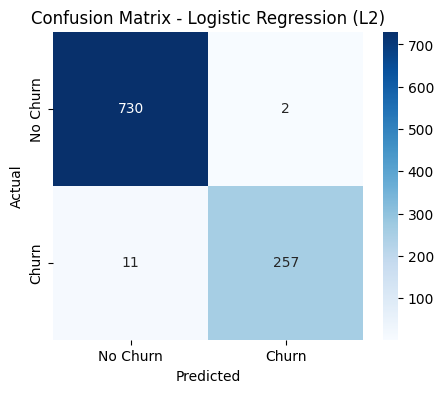


📊 Performance Metrics for Random Forest Classifier:
Accuracy: 0.9890
Precision: 0.9923
Recall: 0.9664
F1-score: 0.9792


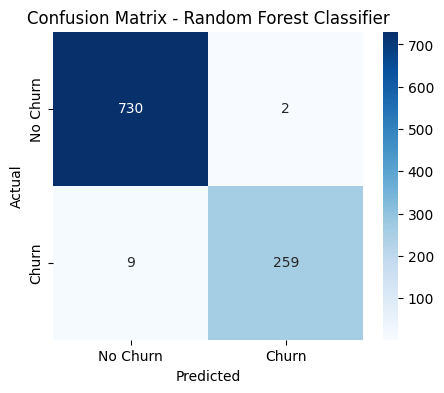

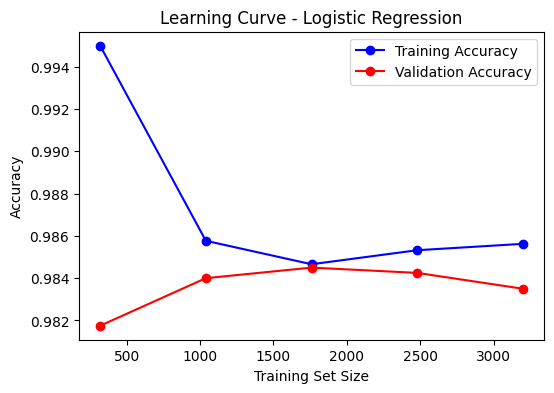

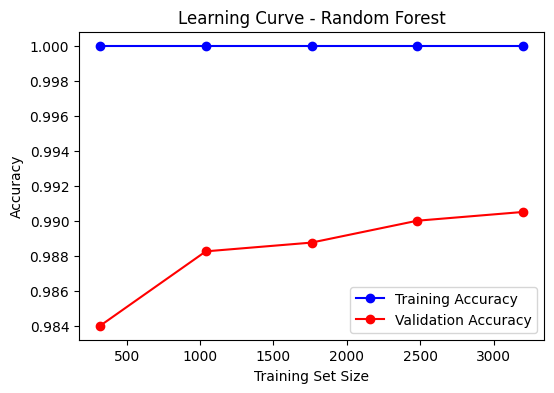

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#  Train Logistic Regression (L2 Regularization)
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

#  Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)  # No need to scale for tree-based models

#  Predictions
y_pred_logreg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test)

#  Model Performance Evaluation
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n📊 Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate Models
evaluate_model("Logistic Regression (L2)", y_test, y_pred_logreg)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)

#  Plot Learning Curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Accuracy")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Learning Curves
plot_learning_curve(log_reg, X_train_scaled, y_train, "Learning Curve - Logistic Regression")
plot_learning_curve(rf_clf, X_train, y_train, "Learning Curve - Random Forest")

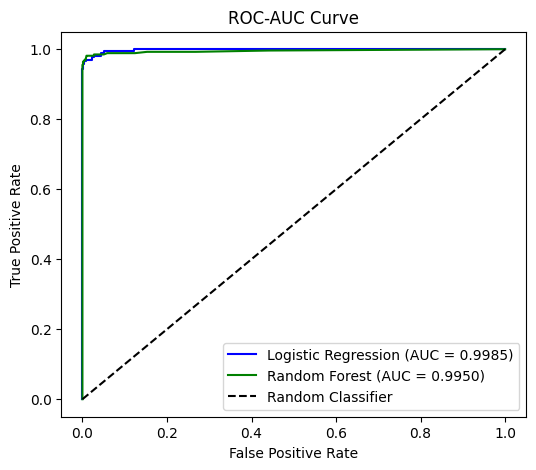

In [55]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for positive class (Churn)
y_prob_logreg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.4f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})", color="green")

# Plot Random Classifier Line
plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


In [56]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(log_reg, "logistic_regression_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [64]:
import joblib
joblib.dump(scaler, "scaler.pkl")  # Save the scaler object

['scaler.pkl']